# Hypothesis Tests
## Name: Brshank Singh Negi
## Roll No: I032
## B.Tech AI
# **EXPT 10**

AIM:
1. Outlier Detection using Z-score / Z-test
2. Use T-test for testing/comparing the means of two samples if they belong to the same population

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
# warnings.filterwarnings('ignore')

In [2]:
mu,sigma=30,5
s=np.random.normal(mu,sigma,100)
print(s)


[27.54274172 40.23508617 23.48193967 28.49480711 27.52202846 31.18853902
 20.33190763 35.99166655 26.39965896 30.94846214 22.55666307 25.03351992
 32.44038382 24.38166944 25.53932283 31.6872087  27.40695685 35.41080973
 30.99179138 22.98319489 26.0020423  25.48804026 38.25695733 23.15041683
 29.22524713 37.83708634 27.04318846 22.83204444 24.69078896 30.81057452
 18.17475526 24.9199254  24.08671896 33.92308073 25.21196955 30.71883696
 28.11974115 44.36660346 33.62226077 23.44197346 22.55388269 30.21415082
 32.72687719 36.97293396 32.27670121 40.05579385 36.43658077 29.17293796
 27.45925021 28.0655532  23.23883148 28.26355452 29.79381649 25.04961128
 31.36160517 26.38401335 34.51805142 33.73611202 19.4980496  28.60787735
 26.24207934 28.93863761 34.95557386 24.57258032 23.1766287  29.75395505
 28.57949042 33.42890629 26.80215961 27.2921378  20.62895588 35.74302249
 35.94456991 25.19685028 36.87198892 33.76543244 26.00917523 31.45058257
 22.84522113 35.31920271 29.01668255 23.63277542 31

(array([ 5.,  8., 18., 20., 15., 13., 11.,  7.,  2.,  1.]),
 array([18.17475526, 20.79394008, 23.4131249 , 26.03230972, 28.65149454,
        31.27067936, 33.88986418, 36.509049  , 39.12823382, 41.74741864,
        44.36660346]),
 <BarContainer object of 10 artists>)

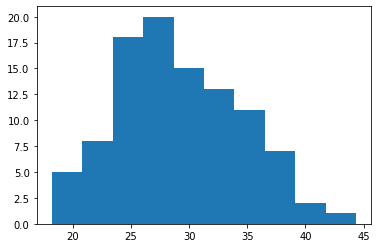

In [3]:
plt.hist(s)

In [4]:
s[85]=120
s[15]=10

In [5]:
np.max(s)

120.0

In [6]:
np.min(s)

10.0

In [7]:
df=pd.DataFrame(s,columns=['Data'])

In [8]:
df

,Data
0,27.542742
1,40.235086
2,23.481940
3,28.494807
4,27.522028
...,...
95,30.256351
96,27.606718
97,37.203764
98,26.431360


In [9]:
for col in df.columns:
    col_zscore=col+'_zscore'
    df[col_zscore]=(df[col]-df[col].mean())/df[col].std(ddof=0)

In [10]:
df['Data_zscore']=(df['Data']-df['Data'].mean())/df[col].std(ddof=0)

In [11]:
df['outlier']=(abs(df['Data_zscore']) >1.95 ).astype(int)

In [12]:
df.loc[df.outlier==1]

,Data,Data_zscore,outlier
85,120.0,8.502179,1


In [13]:
x=int(input('Enter weight of 10 yr old='))


In [14]:
meann=df['Data'].mean()
meann

30.04309263749888

In [15]:
stdd=df[col].std(ddof=0)
stdd

10.580453189852713

In [16]:
abs((x-meann)/stdd)

9.447318141189431

In [17]:
if (abs((x-meann)/stdd) >1.95):
    print('this is an Outlier for X=',x,)
else:
    print('Reject H0:',x,' is not an Outlier')

this is an Outlier for X= 130


# 3 Use T-test for testing comparing the meansa of two samples if t they belong to the same population


In [18]:
np.random.seed(8)

In [19]:
s1_sales=np.random.randint(1500,3000,100)
s1_sales

array([1951, 2864, 1861, 1633, 2486, 1636, 2351, 2884, 1548, 2609, 2328,
       1615, 1958, 2167, 2120, 1769, 2585, 1643, 2873, 2878, 2839, 1770,
       2626, 1849, 1940, 2277, 2063, 2464, 2449, 2327, 1670, 1910, 1822,
       2533, 2905, 1994, 2605, 1847, 1991, 2075, 2098, 2555, 2544, 2185,
       2033, 2212, 2488, 1528, 2235, 2059, 2918, 2441, 2526, 1922, 1699,
       2647, 2900, 2741, 2464, 2817, 2887, 1950, 2990, 2834, 1923, 2134,
       2570, 1851, 2684, 2341, 2494, 1507, 2906, 2917, 2242, 1926, 1519,
       2327, 1804, 2028, 1612, 1706, 1618, 2261, 2451, 2256, 1605, 2288,
       2772, 1598, 2739, 2750, 1506, 2267, 2936, 2334, 2159, 1983, 2599,
       2791])

In [20]:
s2_sales=np.random.randint(500,1500,50)
s2_sales

array([ 674,  720,  956, 1451,  973, 1410, 1179, 1411,  647, 1070, 1372,
       1380,  881,  875,  880, 1055, 1027,  528, 1111, 1428,  669,  644,
       1086,  661,  993, 1462,  954, 1202, 1019, 1351, 1276,  918, 1309,
       1441,  650, 1216,  976,  841, 1061,  919, 1169, 1297, 1248,  692,
       1060, 1200,  684, 1466,  923,  780])

/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'sales prices  '),
 Text(0, 0.5, 'probability value'),
 Text(0.5, 1.0, 'prob. distribution')]

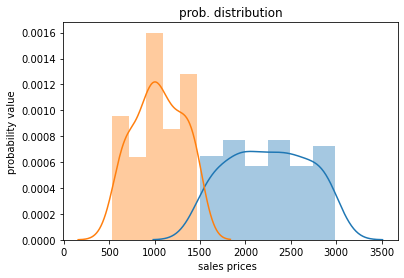

In [25]:
ax=sns.distplot(s1_sales)
ax.set(xlabel='sales prices ',ylabel='probability value',title='prob. distribution')
ax=sns.distplot(s2_sales)
ax.set(xlabel='sales prices  ',ylabel='probability value',title='prob. distribution')

In [ ]:
from scipy.stats import ttest_ind_from_statse

def compare